Exercice 1 : Clustering - Prédiction des nombres Dans  cet  exercice,  on  souhaite  utiliser  un  algorithme  de  clustering  pour  reconnaitre  des 
nombres écrits à main levé. Pour cela, un dataset labélisé existe déjà et vous permettra ainsi 
d’évaluer simplement la qualité de votre clustering.

1/ En utilisant la fonction load_digit de sklearn, charger le dataset et afficher la forme (shape) 
de celui-ci

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits(as_frame=True).frame
X, y = digits.iloc[:, :-1], digits.iloc[:, -1]
random_state = 0

print(digits.shape)

(1797, 65)


2/ En utilisant la fonction imshow de matplotlib, afficher quelques samples du dataset chargé. 
Le titre doit contenir le nombre correspondant à l’image chargée. 

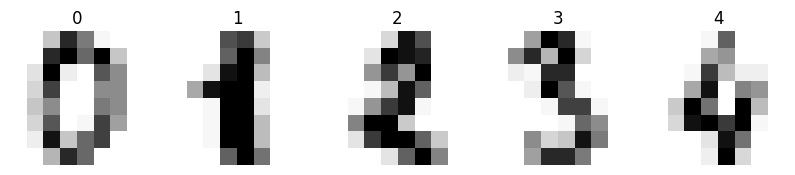

In [96]:
fig, axs = plt.subplots(1, 5, figsize=(10, 5))
plt.set_cmap("Grays")


for i in range(5):

    axs[i].imshow(X.iloc[i].to_numpy().reshape(8, 8))

    axs[i].set_title(y.iloc[i])
    axs[i].axis("off")



plt.show()

3/ En utilisant un des algorithmes vus en cours (KMeans), effectuer un clustering du dataset. 
Quel nombre de cluster doit-on utiliser dans ce cas précis ? 

In [97]:
from sklearn.cluster import KMeans

kmeans = KMeans(10, random_state=random_state).fit(X)
labels = kmeans.labels_

4/ Afficher quelques exemples d’images avec leur label prédit. 

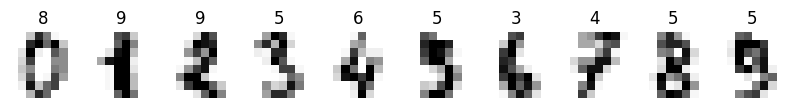

In [98]:
fig, axs = plt.subplots(1, 10, figsize=(10, 5))

for i in range(10):
    axs[i].imshow(X.iloc[i].to_numpy().reshape(8, 8))
    axs[i].set_title(labels[i])
    axs[i].axis("off")

plt.show()

5/ Afficher les centres des clusters trouvés

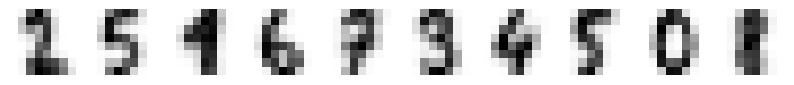

In [99]:
centers = kmeans.cluster_centers_

fig, axs = plt.subplots(1, 10, figsize=(10, 5))

for i in range(10):
    axs[i].imshow(centers[i].reshape(8, 8))
    axs[i].axis("off")

plt.show()

Exercice 2 : Clustering - Recherche du paramètre k optimal

1/ En partant du code de l’exercice 1, écrire une fonction permettant de calculer la moyenne 
des inerties des clusters générés. 

In [100]:
def inertia(data, k):
    kmeans = KMeans(k, random_state=random_state).fit(data)
    return kmeans.inertia_ / data.size

2/  Généraliser  cette  fonction  en  un  code  permettant  de  générer  le  graphe  ci-dessous 
(figure 1)  : il affiche l’inertie du clustering en fonction du nombre de clusters passé en 
paramètre de KMeans. 

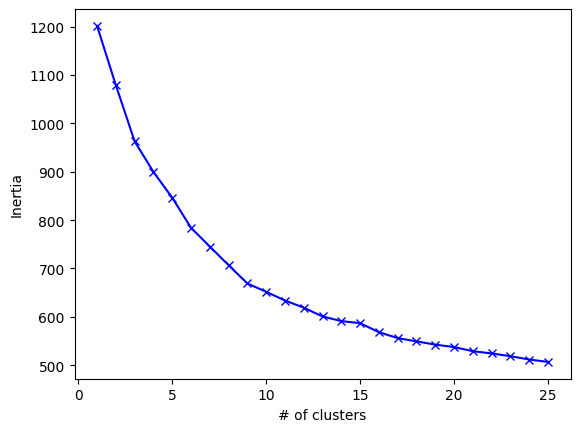

In [101]:
inertias = [
    KMeans(i, random_state=random_state).fit(X).inertia_ / X.shape[0]
    for i in range(1, 26)
]



plt.plot(np.arange(1, 26), inertias, "x-b")


plt.xlabel("# of clusters")


plt.ylabel("Inertia")


plt.show()

3/  Faire  le  même  travail  que  dans  la  question  2  en  calculant  cette  fois  ci  la  distorsion  des 
clusters. 

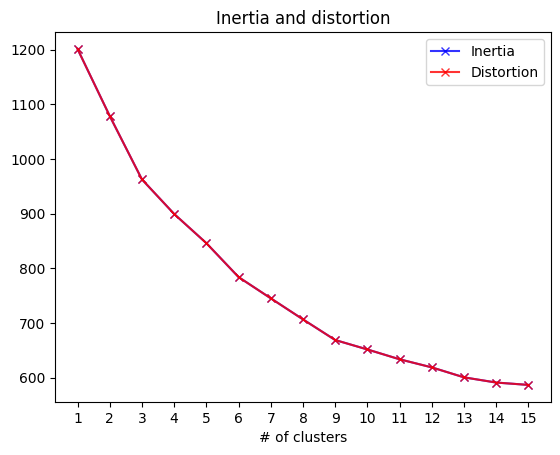

In [102]:
from scipy.spatial.distance import cdist


def find_best_k(X, n):
    n += 1
    inertias = [
        KMeans(i, random_state=random_state).fit(X).inertia_ / X.shape[0]
        for i in range(1, n)
    ]
    distortions = [
        np.mean(
            np.min(
                cdist(
                    X,
                    KMeans(i, random_state=random_state).fit(X).cluster_centers_,
                    "euclidean",
                ),
                axis=1,
            )
            ** 2
        )
        for i in range(1, n)
    ]

    plt.plot(np.arange(1, n), inertias, "x-b", label="Inertia", alpha=0.8)
    plt.plot(np.arange(1, n), distortions, "x-r", label="Distortion", alpha=0.8)

    plt.xlabel("# of clusters")
    plt.title("Inertia and distortion")
    plt.xticks(np.arange(1, n))
    plt.legend()
    plt.show()


find_best_k(X, 15)

4/  Utiliser  les  algorithmes  précédemment  développés  pour  trouver  la  meilleure  valeur  du 
paramètre k pour les datasets suivants :

4.a/ Sur un dataset artificiel généré avec des blobs

(1500, 2)


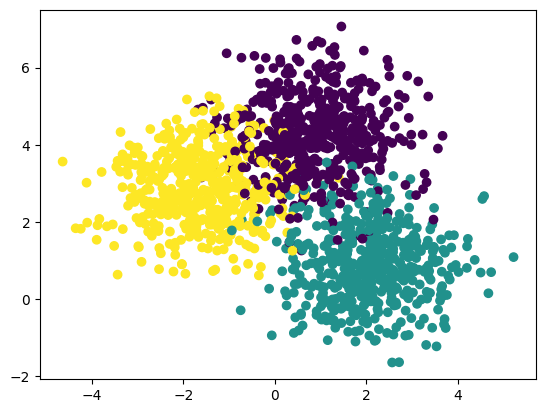

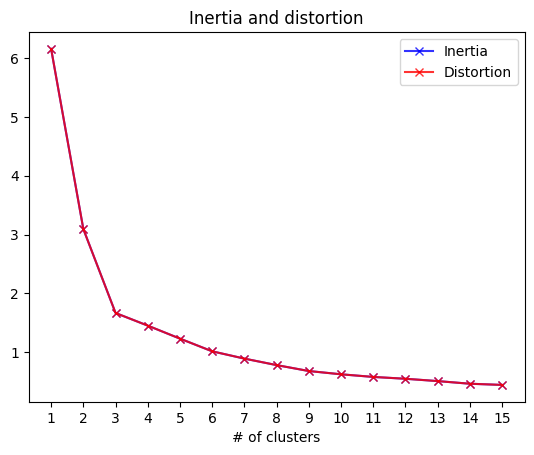

In [103]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1500, random_state=random_state)
print(X.shape)

plt.set_cmap("viridis")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

find_best_k(X, 15)

4.b/ Sur le dataset IRIS (voir la fonction load_iris pour cela et explorer le dataset)

(150, 4)


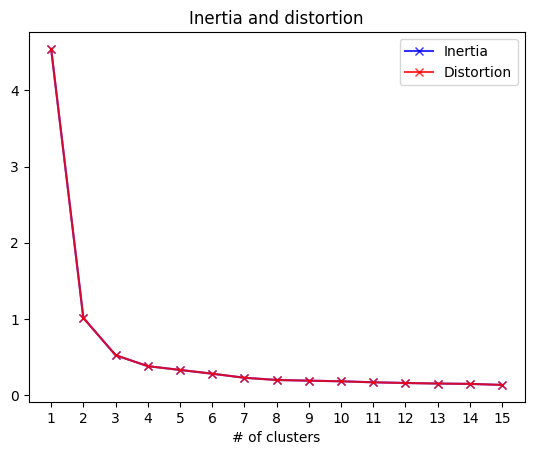

In [104]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True).frame
X, y = iris.iloc[:, :-1], iris.iloc[:, -1]
print(X.shape)

find_best_k(X, 15)

4.c/ Sur le dataset Experience and Salary

(30, 1)


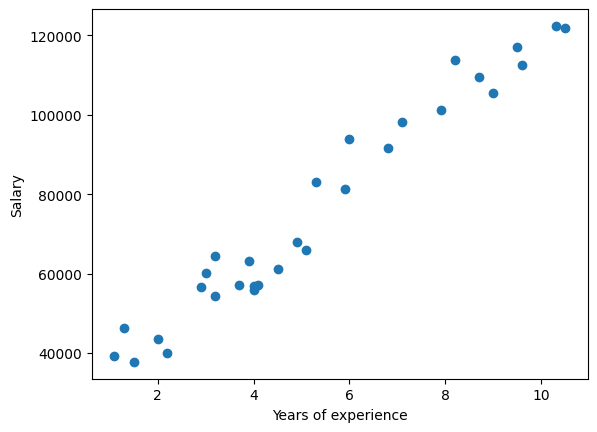

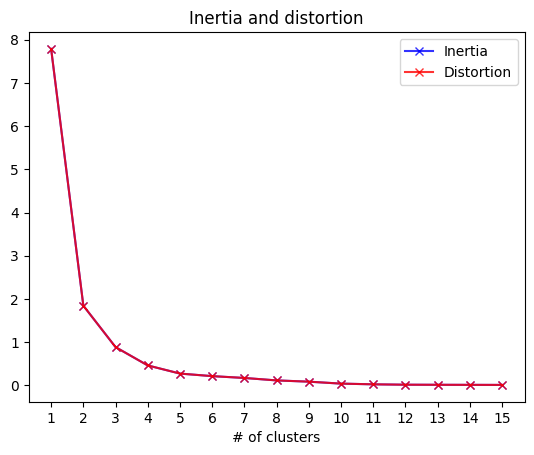

In [105]:
salary = pd.read_csv("Salary_Data.csv")

X, y = salary.iloc[:, :-1], salary.iloc[:, -1]
print(X.shape)

plt.scatter(X, y)
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

find_best_k(X, 15)

Exercice 5 : Clustering - Autres méthodes de clustering

1/ En utilisant la fonction make_classification, générer un dataset artificiel contenant 2 ou 3 
caractéristiques (pour que le dataset soit affichable sur un graphe), 2 classes avec 1 cluster 
par classe et 1000 exemples.

(1000, 3)


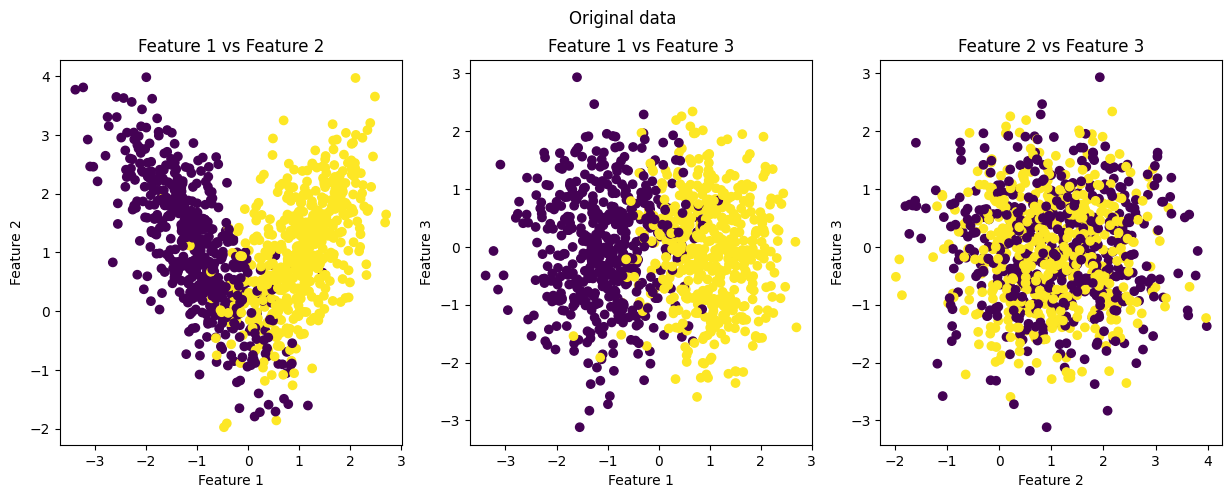

In [111]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=3,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=random_state,
)
print(X.shape)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
features = ["Feature 1", "Feature 2", "Feature 3"]
pairs = [(0, 1), (0, 2), (1, 2)]
for i, (a, b) in enumerate(pairs):
    axs[i].scatter(X[:, a], X[:, b], c=y)
    axs[i].set_title(f"{features[a]} vs {features[b]}")
    axs[i].set_xlabel(features[a])
    axs[i].set_ylabel(features[b])

plt.suptitle("Original data")
plt.show()

2/ Explorer, analyser et tester les algorithmes de clustering suivants

2.a/ KMeans

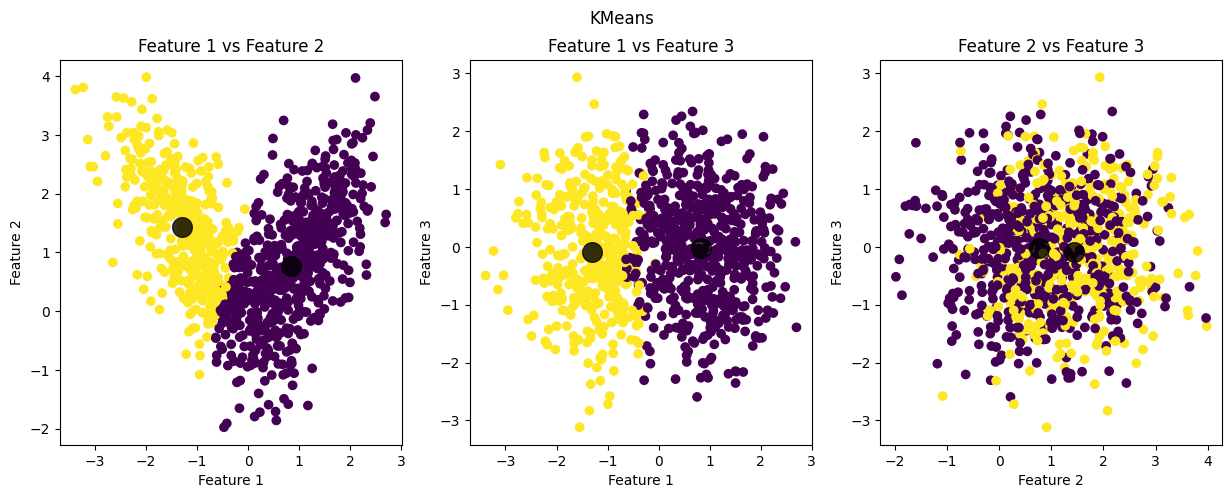

In [112]:
def cluster_algo(algo):
    labels = algo.fit_predict(X)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    features = ["Feature 1", "Feature 2", "Feature 3"]
    pairs = [(0, 1), (0, 2), (1, 2)]
    for i, (a, b) in enumerate(pairs):
        axs[i].scatter(X[:, a], X[:, b], c=labels)
        axs[i].set_title(f"{features[a]} vs {features[b]}")
        axs[i].set_xlabel(features[a])
        axs[i].set_ylabel(features[b])

        if hasattr(algo, "cluster_centers_"):
            axs[i].scatter(
                algo.cluster_centers_[:, a],
                algo.cluster_centers_[:, b],
                c="black",
                s=200,
                alpha=0.8,
                label="Centers",
            )

    plt.suptitle(type(algo).__name__)
    plt.show()


cluster_algo(KMeans(n_clusters=2, random_state=random_state))

2.b/ DBScan (Density-Based Spatial Clustering of Application and Noise)

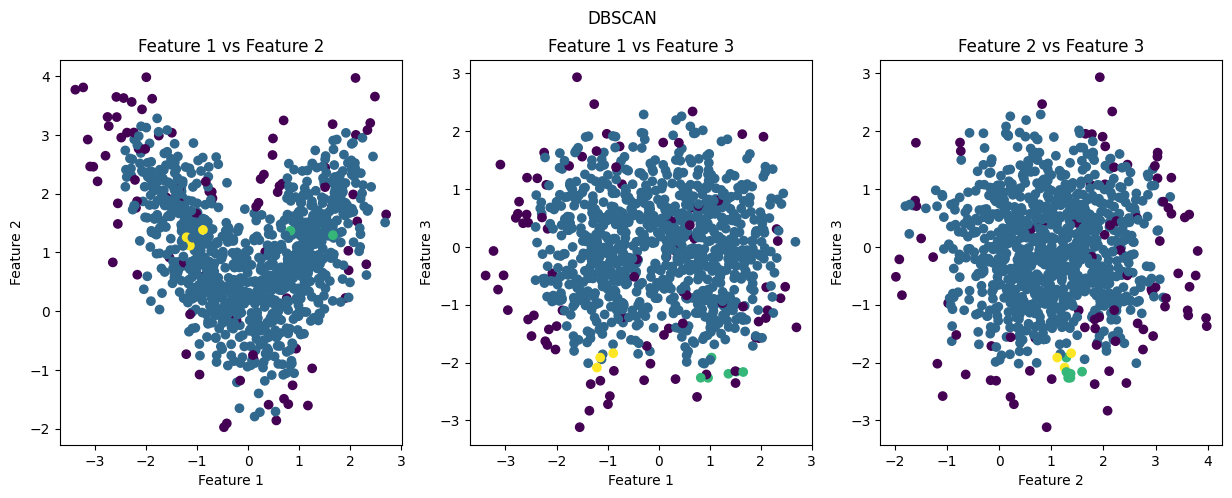

In [113]:
from sklearn.cluster import DBSCAN

cluster_algo(DBSCAN())

2.c/ GMM (Gaussian Mixture Model)

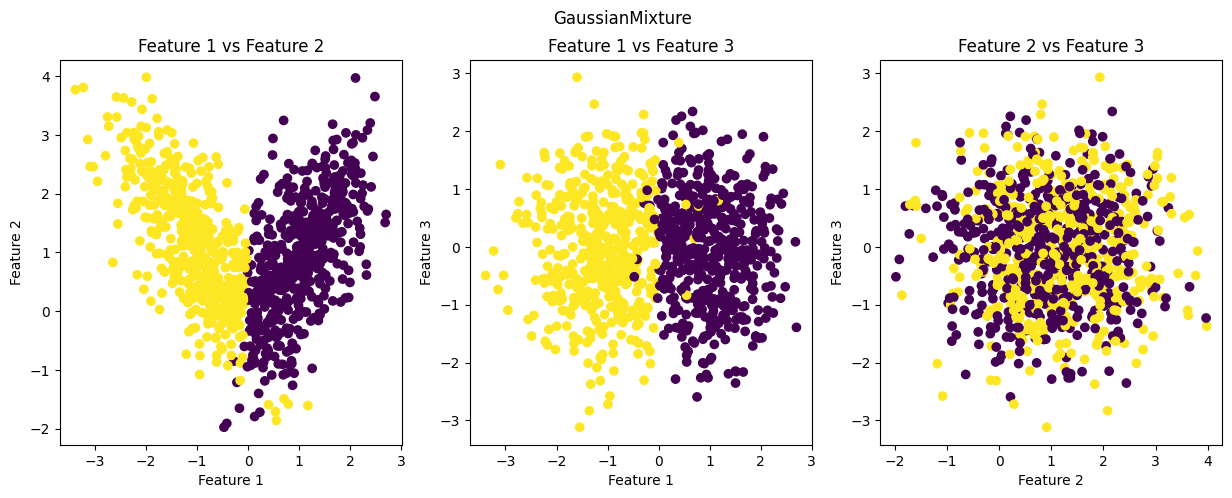

In [116]:
from sklearn.mixture import GaussianMixture

cluster_algo(GaussianMixture(2, random_state=random_state))